In [1]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')


Loading Datasets

In [3]:
pd.set_option('display.max_columns',10,'display.width',1000)
train = pd.read_csv('Titanic-Dataset.csv')
test = pd.read_csv('Titanic-Dataset.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [5]:
train.shape


(891, 12)

In [6]:
test.shape

(891, 12)

Checking for Null Values 

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Description of Dataset

In [9]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [12]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [13]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [14]:
male_ind = len(train[train['Sex'] == 'male'])
print("No of Males in Titanic:", male_ind)

No of Males in Titanic: 577


In [15]:
female_ind = len(train[train['Sex'] == 'female'])
print("No of Females in Titanic:", female_ind)

No of Females in Titanic: 314


<function matplotlib.pyplot.show(close=None, block=None)>

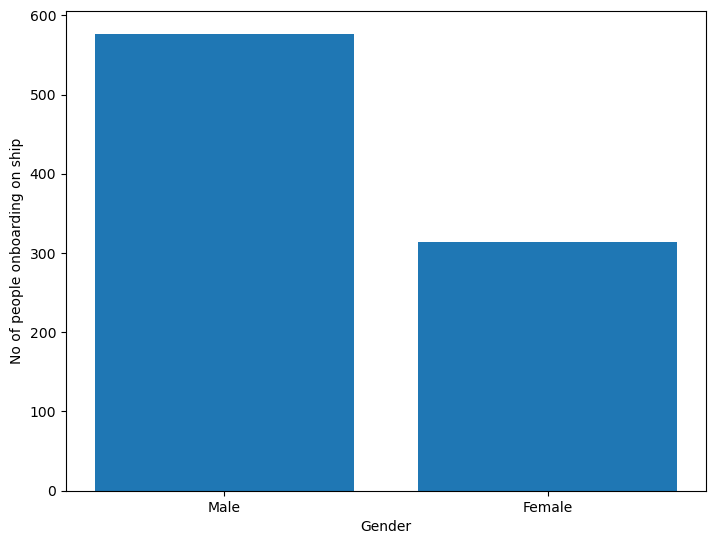

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577, 314]
ax.bar(gender, index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding on ship")
plt.show

In [20]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

In [21]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


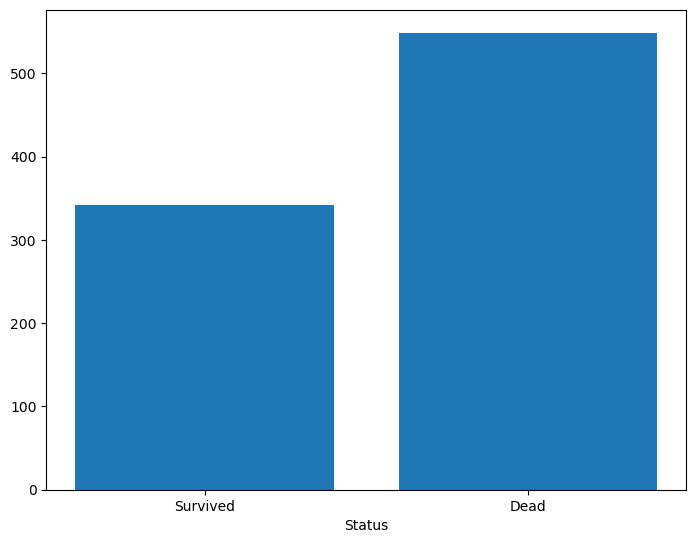

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived' ,'Dead']
ind = [alive , dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, "Bar graph of people according to ticket class in which people couldn't survived")

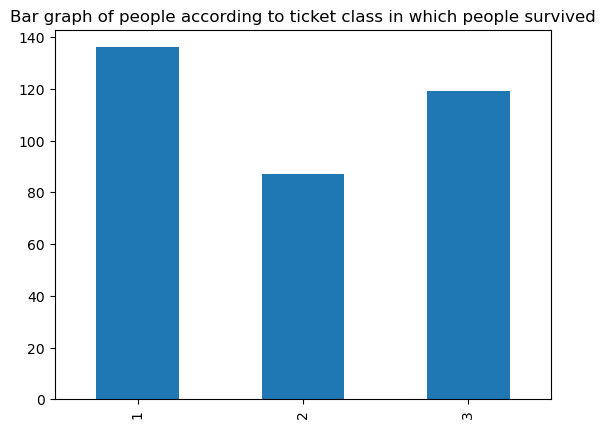

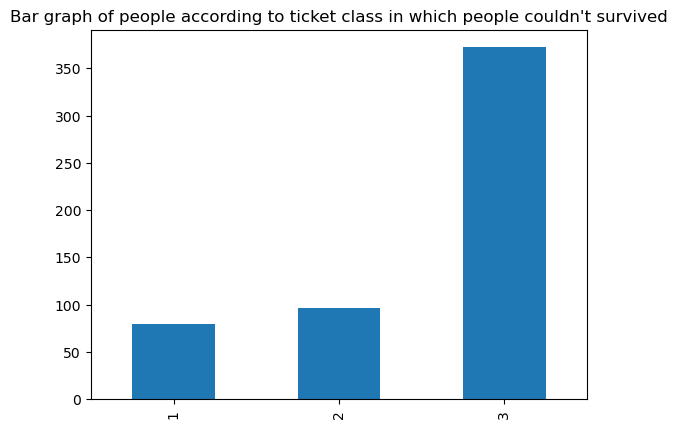

In [27]:
plt.figure(1)
train.loc[train['Survived'] == 1,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people survived')

plt.figure(2)
train.loc[train['Survived'] == 0,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people couldn\'t survived')

([<matplotlib.axis.XTick at 0x238ce282410>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

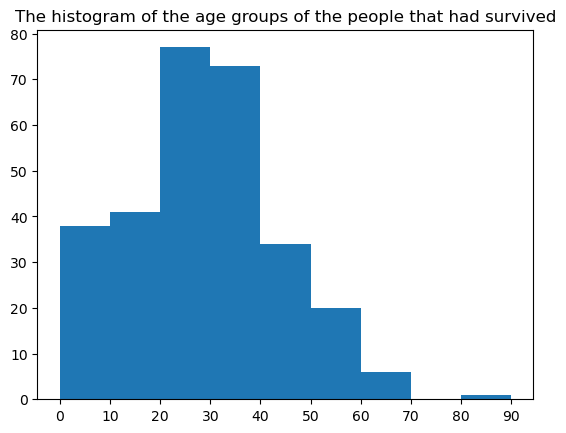

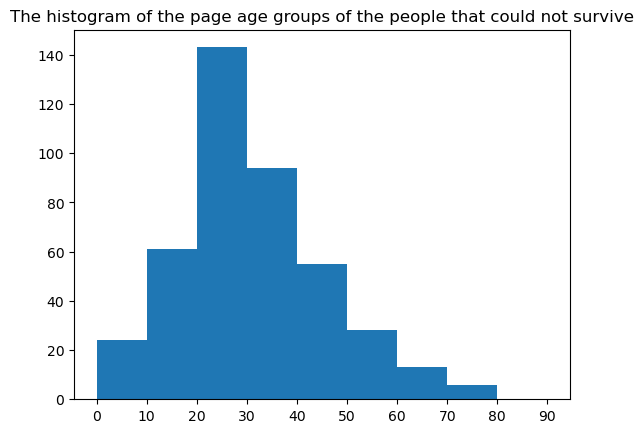

In [49]:
plt.figure(1)
age = train.loc[train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, num.arange(0,100,10))
plt.xticks(num.arange(0,100,10))


plt.figure(2)
age = train.loc[train.Survived == 0 , 'Age']
plt.title('The histogram of the page age groups of the people that could not survive')
plt.hist(age, num.arange(0,100,10))
plt.xticks(num.arange(0,100,10))

In [52]:
train[["SibSp","Survived"]].groupby(['SibSp'], as_index = False).mean().sort_values(by ='Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [54]:
train[["Pclass" ,"Survived"]].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived' ,ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [55]:
train[["Age" ,"Survived"]].groupby(['Age'], as_index = False).mean().sort_values(by='Age' ,ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [57]:
train[["Embarked","Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


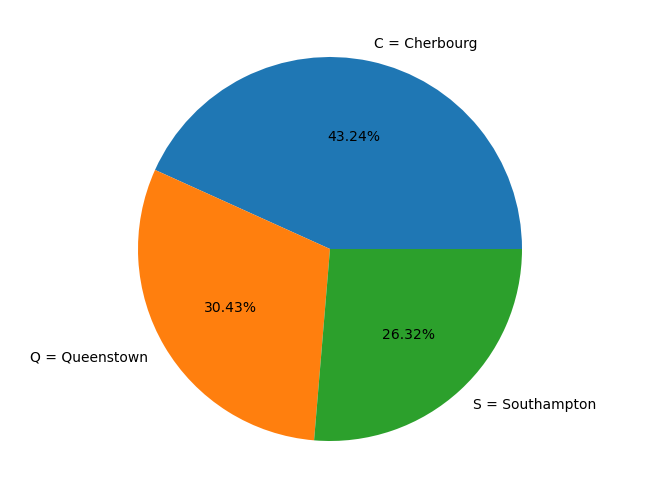

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg' ,'Q = Queenstown' , 'S = Southampton']
s = [0.553571, 0.389610,0.336957]
ax.pie(s,labels = l ,autopct = '%1.2f%%')
plt.show()

In [60]:
test.describe(include ="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
##Droping Useless Columns

In [61]:
train = train.drop(['Ticket'],axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [62]:
train = train.drop(['Cabin'],axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [63]:
train = train.drop(['Name'],axis = 1)
test = test.drop(['Name'], axis = 1)

# Feature Selection

 training values


In [64]:
column_train =['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
X = train[column_train]
Y = train['Survived']

In [67]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [ ]:
# Now we have to fill all the missing values

In [68]:
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [72]:
X['Embarked'] = train['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

0

# Now we need to convert sex value into integers 

In [73]:
d ={'male':0, 'female':1}
X['Sex'] = X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [74]:
e={'C':0,'Q':1,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

# Traning Testing and Spliting the model

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.3,random_state =7)

# Using LogisticRegression

In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))

Accuracy Score: 0.7611940298507462


# Confusion Matrix

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[131  25]
 [ 39  73]]


# Using Support Vector

In [83]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train, Y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=", accuracy_score(Y_test,pred_y))

Acc= 0.6604477611940298


In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



# Using KNN Neighbors

In [87]:
from sklearn.neighbors import KNeighborsClassifier
model12 = KNeighborsClassifier(n_neighbors= 5)
model12.fit(X_train,Y_train)
y_pred2 = model12.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(Y_test, y_pred2))


Accuracy Score: 0.6604477611940298


In [89]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
confusion_mat = confusion_matrix(Y_test,y_pred2) 
print(confusion_mat)
print(classification_report(Y_test,y_pred2))

[[127  29]
 [ 62  50]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       156
           1       0.63      0.45      0.52       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.66      0.66      0.65       268



# GaussianNB

In [103]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 =model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuarcy Score:", accuracy_score(Y_test,y_pred3))

Accuarcy Score: 0.7686567164179104


In [104]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



# Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train, Y_train)
y_pred4 =model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7425373134328358


In [109]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

[[132  24]
 [ 45  67]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



In [113]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines','Naive Bayes','KNN', 'Decision Tree'],
    'Score': [0.75, 0.66,0.76,0.66,0.74]})

result_df = results.sort_values(by='Score', ascending =False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,KNN
